# Analysis of product sales
I created this project for Data Analyst exam from Data Camp. Main goal was analysis of revenue to choose the best sales method for company for following weeks. <br/>
Data set was provided by Data Camp and it contains information about each sale. If You are interested in full description of task, please contact me.

In [1]:
#Importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
#Importing data set
df = pd.read_csv('C:\projects\DataCamp_task\product_sales.csv')
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [3]:
# First I will check basic information about dataset and features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [4]:
df.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


In [5]:
#For each object type column, I check unique values to see if there some misspelled values. (At notebook I showed feature with errors)
df['sales_method'].unique()

array(['Email', 'Email + Call', 'Call', 'em + call', 'email'],
      dtype=object)

In [6]:
#I replaced misspelled values with correct ones 
print(df.sales_method.unique())
df.replace({'sales_method' : {'em + call' : 'Email + Call', 'email' : 'Email' }}, inplace = True)
print(df.sales_method.unique())

['Email' 'Email + Call' 'Call' 'em + call' 'email']
['Email' 'Email + Call' 'Call']


In [7]:
#To fix null values in revenue column I will fill them with average value corresponding to each sale method.
#For example null value from call method was filled with average revenue of this method
email_rev = df[df['sales_method'] == 'Email'].revenue.mean()
emcal_rev = df[df['sales_method'] == 'Email + Call'].revenue.mean()
call_rev = df[df['sales_method'] == 'Call'].revenue.mean()

print(f'Mean email revenue = {email_rev}')
print(f'Mean email + call revenue = {emcal_rev}')
print(f'Mean call revenue = {call_rev}')

Mean email revenue = 97.12768419531928
Mean email + call revenue = 183.651232568601
Mean call revenue = 47.59746705710102


In [11]:
#Filling null values with corresponding average values
df[df['sales_method'] == 'Email'] = df[df['sales_method'] == 'Email'].fillna(email_rev)
df[df['sales_method'] == 'Email + Call'] = df[df['sales_method'] == 'Email + Call'].fillna(emcal_rev)
df[df['sales_method'] == 'Call'] = df[df['sales_method'] == 'Call'].fillna(call_rev)

#After clearing there is no null values in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            15000 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


# Data validation
Dataset **product_sales.csv** contains 15000 rows and 8 features. Not all features were used by me during analysis, becouse feature like customer_id gives no usefull information. Also I focused more on revenue than nb_sold, becouse in this task for company income from sales is more important than quantity of sold stock.

<table>
  <tr>
    <th>Feature</th>
    <th>Values</th>
    <th>Validation</th>
  </tr>
  <tr>
    <th>week</th>
    <th>6  weeks (from 1 to 6)</th>
    <th>No null values. Cleaning is not needed.</th>
  </tr>
  <tr>
    <th>sales_method</th>
    <th>3 methods</th>
    <th>No null values. Before cleaning there were, by error, values like 'email' (with small letter) and 'em + call', I changed them to correct version.</th>
  </tr>
  <tr>
    <th>customer_id</th>
    <th>unique value for every row</th>
    <th>No null values. Cleaning is not needed.</th>
  </tr>
  <tr>
    <th>nb_sold</th>
    <th>discrete values</th>
    <th>No null values. Max value: 16. Cleaning is not needed</th>
  </tr>
  <tr>
    <th>revenue</th>
    <th>continous values</th>
    <th>1074 values are null. I filled null values with average value of revenue corresponding to sales method. For example null value from call method was filled with average revenue of this method.</th>
  </tr>
  <tr>
    <th>years_as_customer</th>
    <th>discrete values</th>
    <th>No null values. Cleaning is not needed.</th>
  </tr>
  <tr>
    <th>nb_site_visits</th>
    <th>discrete values</th>
    <th>No null values. Cleaning is not needed.</th>
  </tr>
  <tr>
    <th>state</th>
    <th>50 states</th>
    <th>No null values. Cleaning is not needed.</th>
  </tr>
</table>


# Number of customer for each approach


Company over this 6 weeks got most of clients by email approach. **Email + call approach** provided the smallest number of clients, but without analysis of revenue and revenue over time is hard to see which method will be the best. 


In [13]:
# I created panda series with number of customers order for next chart
method_order = df.groupby('sales_method')['customer_id'].count().sort_values()
method_order

sales_method
Email + Call    2572
Call            4962
Email           7466
Name: customer_id, dtype: int64

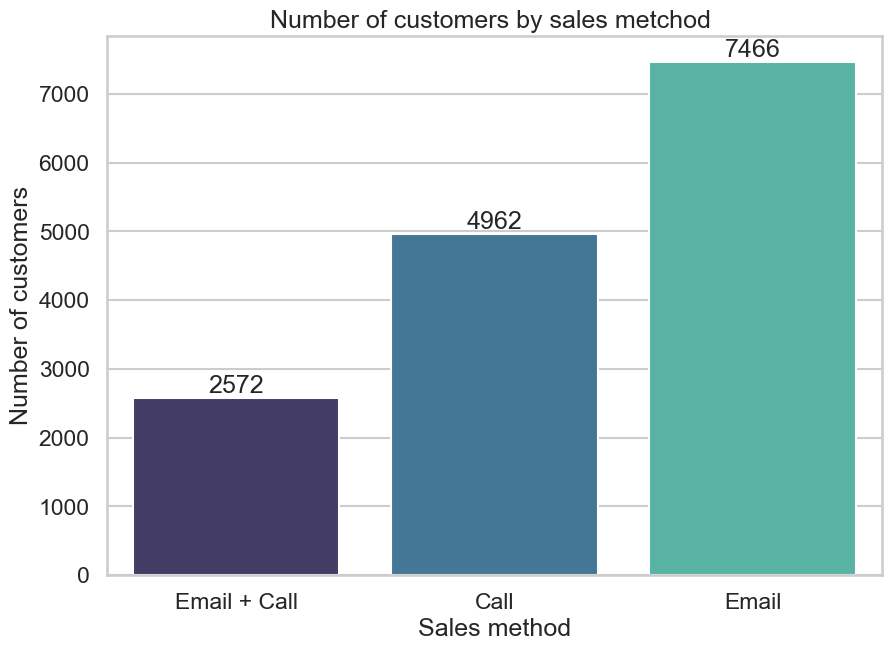

In [14]:
# Choosing sufficient style for chart, which will be used in presentation
sns.set_context("talk")
sns.set_style('whitegrid')

# Plotting chart
ax = plt.figure(figsize=(10,7))
ax = sns.countplot(x = df['sales_method'], palette = 'mako', order = method_order.index)
ax.bar_label(ax.containers[0]) # adding value to each bar

ax.set_ylabel('Number of customers')
ax.set_xlabel('Sales method')
plt.title('Number of customers by sales metchod ')
plt.show()

# Distribution of revenue
From distibution of revenue we can see that usually sale has revenue around 100. There is also large number of sales with small revenue around 50. There is no outliers, which could be confusing during analysis.

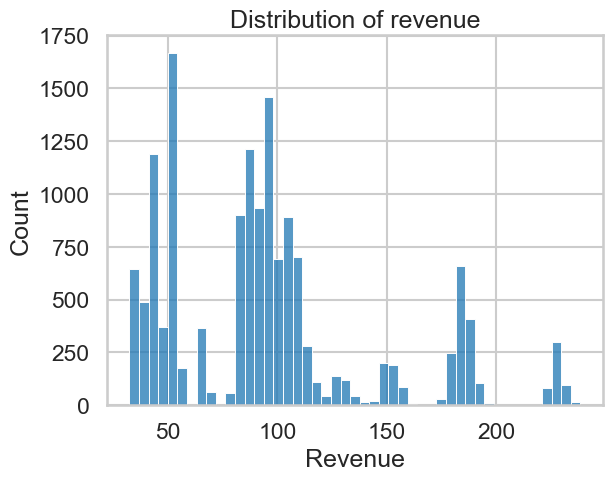

In [15]:
#Plotting chart 
ax = sns.histplot( data = df, x = 'revenue')

ax.set_xlabel('Revenue')
plt.title('Distribution of revenue')
plt.show()

## Revenue by approach
When we check total revenue over this 6 weeks by approach, we can see that **email method** provided the best value. But this time **call method** provided the smallest value. **Email + call approach** has the best ratio of total revenue / number of clients, much better than call or email approach.

Box plot of distribution of sales revenue shows that **email + call approach** provides the biggest average revenue. **Call approach** provided worst values and email method even if provided big number of clients, sells for this approach gives on averega much less revenue than **email + call method**. 

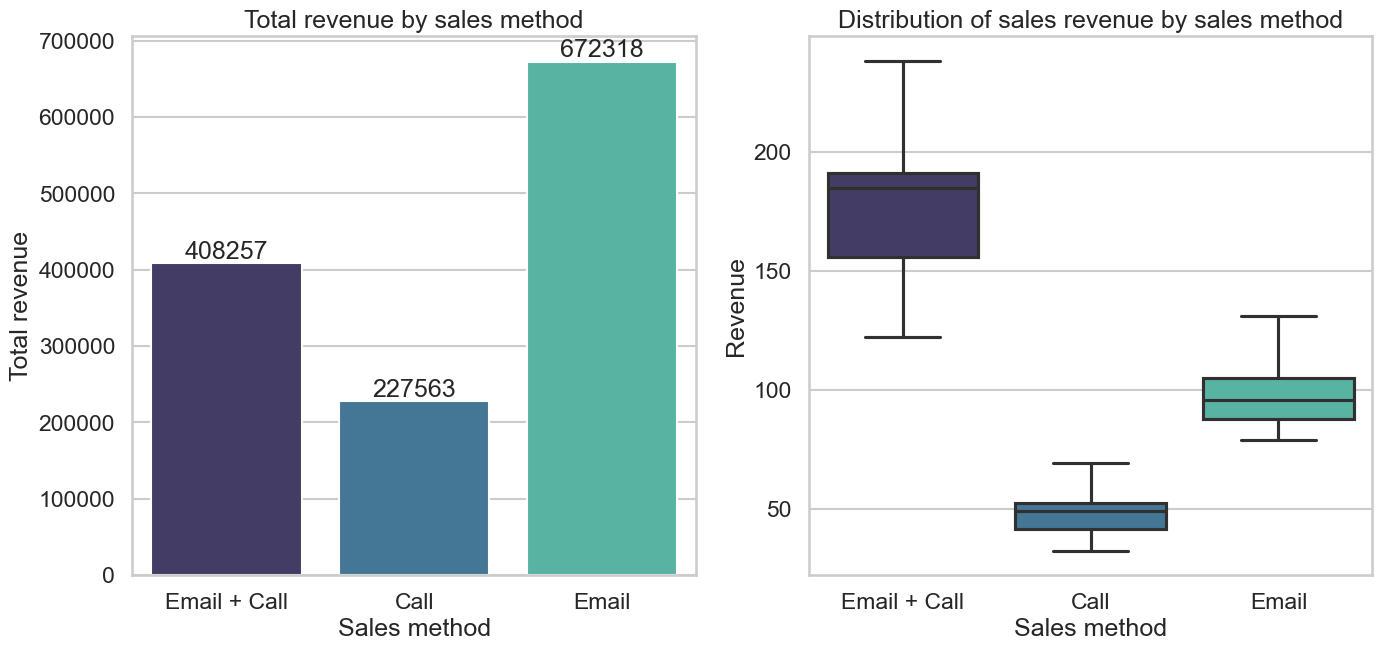

In [16]:
#Plotting two charts
fig, axes = plt.subplots(1,2,figsize=(16,7))

axa = sns.barplot(data= df, x = 'sales_method', y = 'revenue', estimator = 'sum', errorbar = None, palette = 'mako', ax = axes[0])
axa.bar_label(axa.containers[0])
axa.set_ylabel('Total revenue')
axa.set_xlabel('Sales method')
axa.title.set_text('Total revenue by sales method')

axb = sns.boxplot(data = df, x = 'sales_method', y = 'revenue', palette = 'mako', showfliers = False, ax = axes[1] )
axb.title.set_text('Distribution of sales revenue by sales method')
axb.set_xlabel('Sales method')
axb.set_ylabel('Revenue')

plt.show()

## Revenue by week
Overall total revenue has downward trend. The biggest revenue company has at first week during launch of new line of office stationery. 

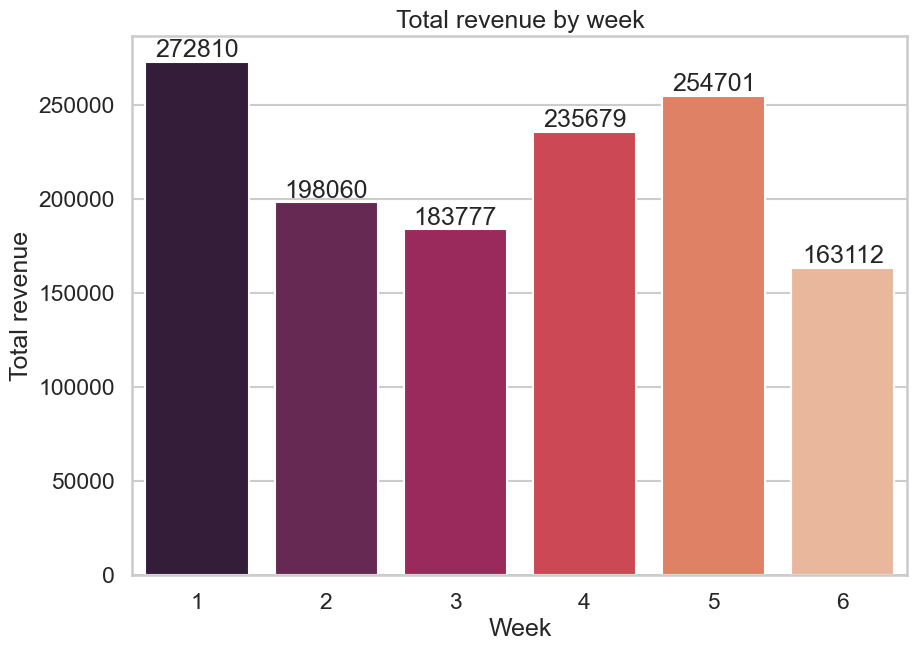

In [13]:
ax = plt.figure(figsize=(10,7))

ax = sns.barplot(data= df, x = 'week', y = 'revenue', estimator = 'sum', errorbar = None, palette = 'rocket')
ax.bar_label(ax.containers[0])
ax.set_ylabel('Total revenue')
ax.set_xlabel('Week')
plt.title('Total revenue by week')
plt.show()

## Revenue by years as customer
Most of revenue is provided by new clients or customers who has been with our company less than 5 years. We can see that company still have loyal customers, but overall they are not interested in our new line (some clients can be interested only at rest of our products and they did not purchase anything from new line of office stationery) or they are very small part of our total number of clients.

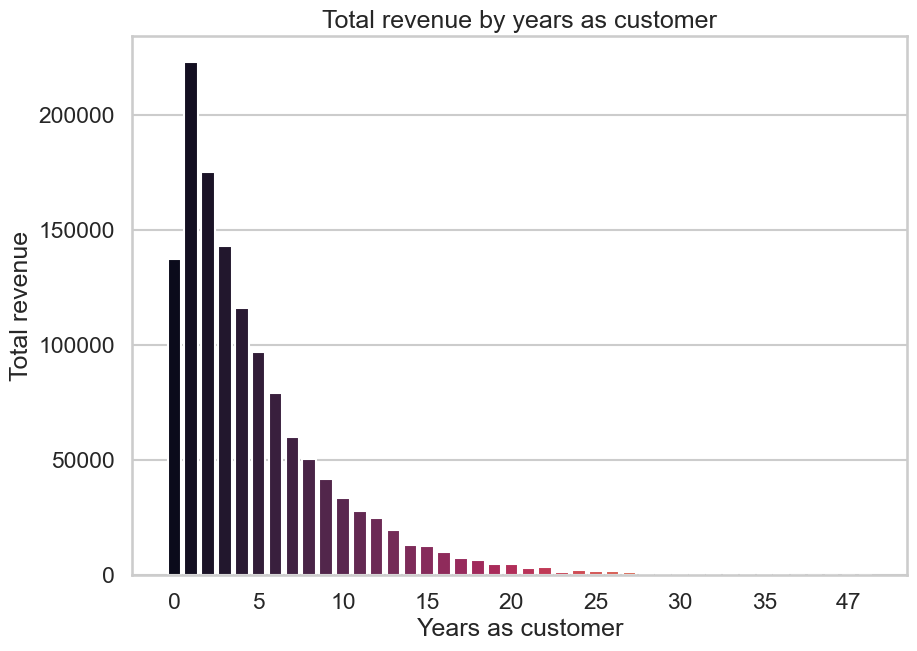

In [15]:
ax = plt.figure(figsize=(10,7))
ax = sns.barplot(data= df, x = 'years_as_customer', y = 'revenue', estimator = 'sum', errorbar = None, palette = 'rocket')
ax.set_ylabel('Total revenue')
ax.set_xlabel('Years as customer')
plt.title('Total revenue by years as customer')

plt.locator_params(axis='x', nbins=10) # I changed how many values should be displayed on x axis
plt.show()

# Revenue over time for each approach

Total revenue from **email approach** decreased over time to level smaller than even total revenue of **call method**. We can see that **email + call method** has positive trend and after few weeks it provides highest revenue. Propably after some time potential customers were not interested at company new line and email approach without human contact by phone was not enough to attract new clients. 

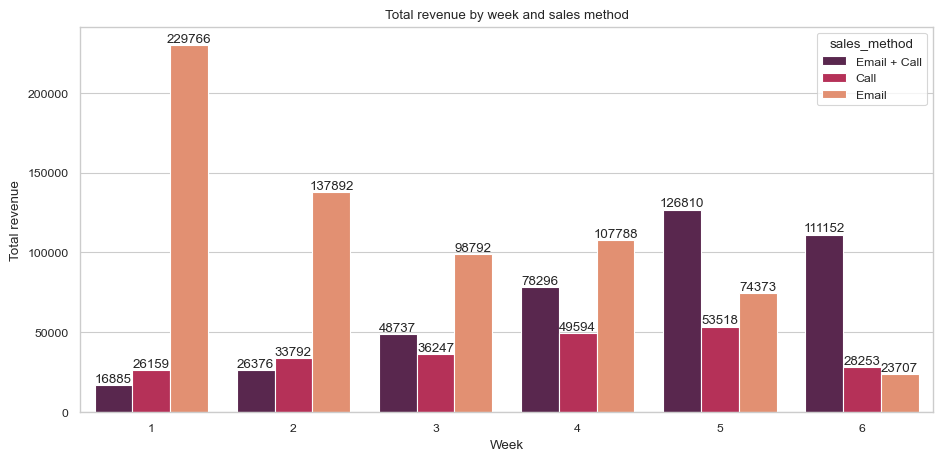

In [16]:
sns.set_context("paper") # I changed context to smaller one 

ax = plt.figure(figsize=(11,5))
ax = sns.barplot(data= df, x = 'week', y = 'revenue', estimator = 'sum',hue = 'sales_method', errorbar = None, palette = 'rocket')

for label in ax.containers: # Adding values to multiple bars 
    ax.bar_label(label, fmt='%.f')

ax.set_ylabel('Total revenue')
ax.set_xlabel('Week')
plt.title('Total revenue by week and sales method')
plt.show()

We can clearly see that only **email + call** method has growing trend. 

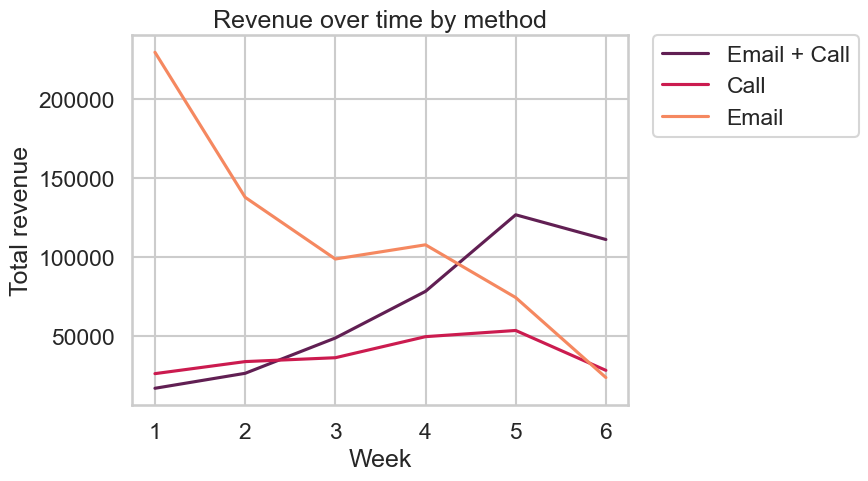

In [17]:
sns.set_context("talk")

ax = sns.lineplot(data= df, x = 'week', y = 'revenue', estimator = 'sum',hue = 'sales_method', errorbar = None, palette = 'rocket')
ax.set_xlabel('Week')
ax.set_ylabel('Total revenue')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0) # I moved legend outside the chart
plt.title('Revenue over time by method')
plt.show()

# Business Metrics


Company wants to achive bigger profit from new product line. Bigger number of sales not always gives better profit, so it more efficient to monitor total revenue. When company will focus on best sales method it should **monitor if over time total revenue by week will increase**.

Based on the data, at 6th week total revenue has value of **163112**. If company will reach constant higher total revenue in following weeks this will indicate that strategy of focusing on one sales method works and company has chance to reach its goal and reverse downward trent. 
_______

# Recomendation 

After analysis I have following recomendation, which can increase chance of growing trend of total revenue:
* The best sales method is **email + call method** and company should focus on this approach in next weeks.
>It provieds bigger average revenue and has positive trend. Company should focus on this approach, becouse rest of methods are ineffective after this 6 weeks and has very low total revenue. 

> Requeires less work than call method and more than email method, but trade off between work and revenue for this method is the most efficient. 
* After few weeks company should use business metrics to check if email + call strategy helped achive goal. 
* Focus on keeping new clients, becouse they provide much bigger total revenue than old clients. 
* Better Data Collection, particularly in revenue feature.
> There should be no missing values in revenue column, because it used to calculate main metrics.
